<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import random 

In [2]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [3]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)
rentals.drop(columns=['rental_id', 'building_id'], inplace=True)

In [5]:
rentals.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,2550,0.0,1,480,9,2.0,17,yes,yes,no,no,yes,yes,no,yes,Upper East Side,All Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,no,no,no,no,no,no,no,no,Greenwich Village,All Downtown,Manhattan
2,3000,3.0,1,1000,4,1.0,106,no,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
3,4500,1.0,1,916,2,51.0,29,no,yes,no,yes,yes,yes,no,no,Midtown,All Midtown,Manhattan
4,4795,1.0,1,975,3,8.0,31,no,no,no,yes,yes,yes,no,yes,Greenwich Village,All Downtown,Manhattan


In [8]:
rentals.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200
std,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501
min,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000
25%,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000
50%,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000
75%,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000
max,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000


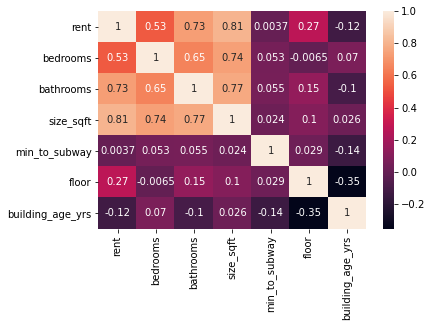

In [18]:
cols = ['rent','bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs']

correlation_matrix = rentals[cols].corr()

sns.heatmap(data=correlation_matrix, annot=True);

In [24]:
correlation_matrix = rentals[['rent','bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs']].corr()

correlation_matrix

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000


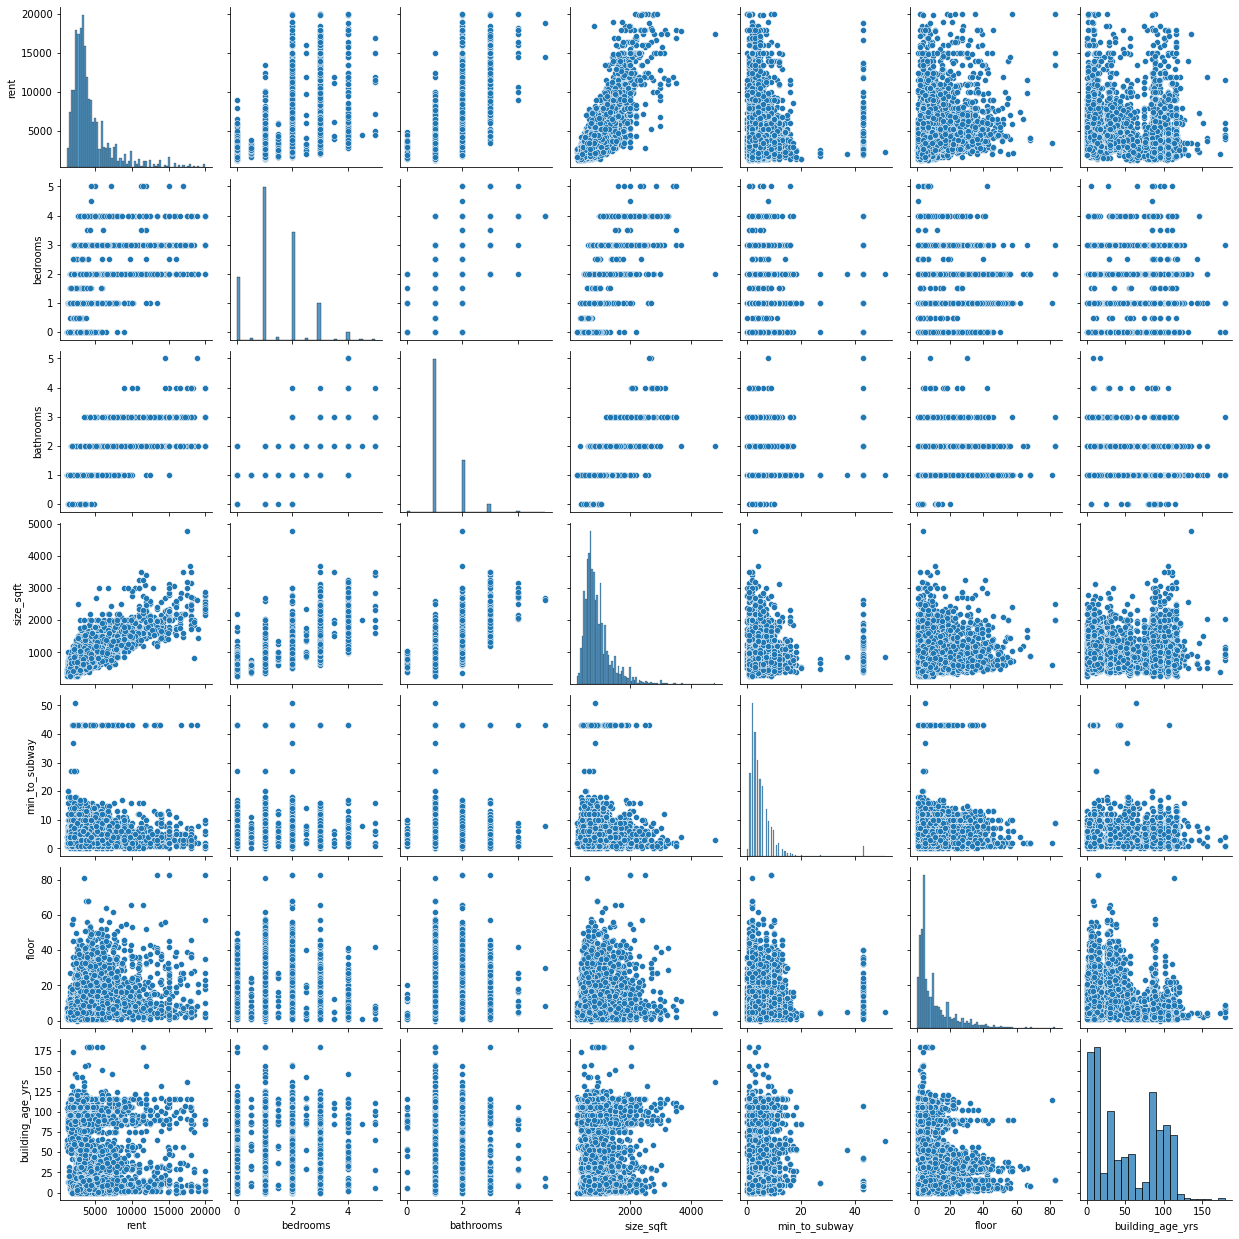

In [21]:
import seaborn as sns
sns.pairplot(rentals[cols]);

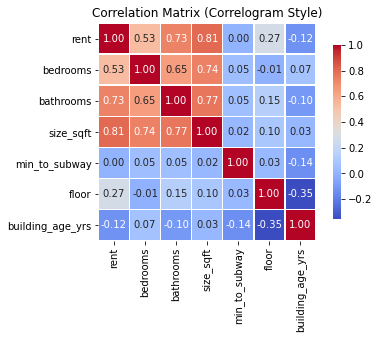

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix (Correlogram Style)")
plt.show()


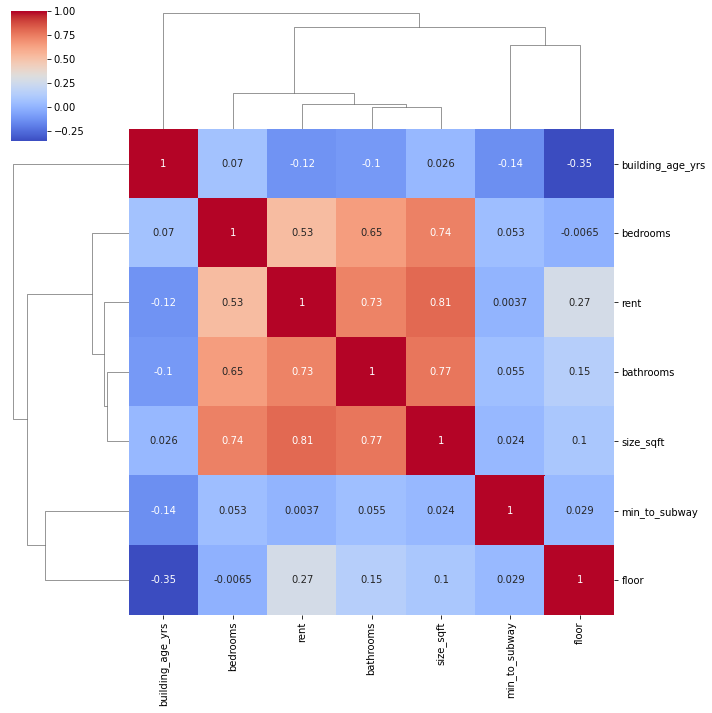

In [32]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm');


In [25]:
rentals.groupby("borough").mean()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
borough,,,,,,,
Brooklyn,3327.403751,1.578973,1.234946,899.414610,4.721619,6.206318,55.730503
Manhattan,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914
Queens,2516.147321,1.327009,1.160714,811.841518,6.743304,5.626116,44.645089


In [30]:
rentals.groupby("borough").median().rent

borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

In [31]:
rentals.groupby("borough").mean().rent

borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64

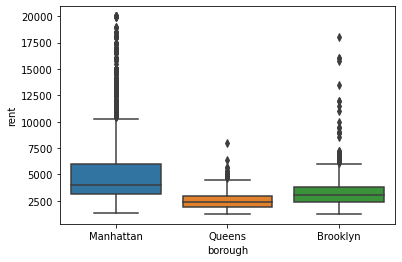

In [35]:
sns.boxplot(x="borough", y="rent", data=rentals)
plt.show()

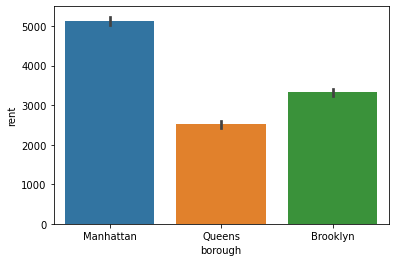

In [36]:
sns.barplot(x="borough", y="rent", data=rentals)
plt.show()

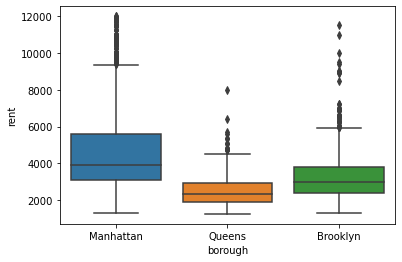

In [38]:
sns.boxplot(x="borough", y="rent", data=rentals[rentals.rent<12000])
plt.show()

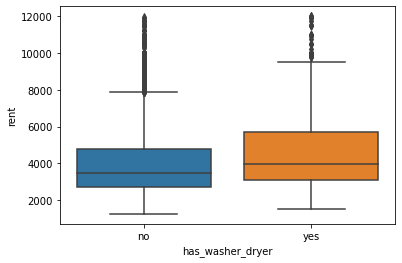

In [40]:
sns.boxplot(x="has_washer_dryer", y="rent", data=rentals[rentals.rent<12000])
plt.show()

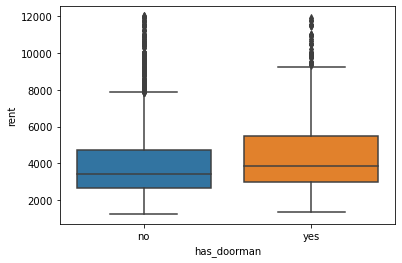

In [41]:
sns.boxplot(x="has_doorman", y="rent", data=rentals[rentals.rent<12000])
plt.show()

In [45]:
rentals.groupby("has_washer_dryer").mean().rent

has_washer_dryer
no     4426.231817
yes    5253.503737
Name: rent, dtype: float64

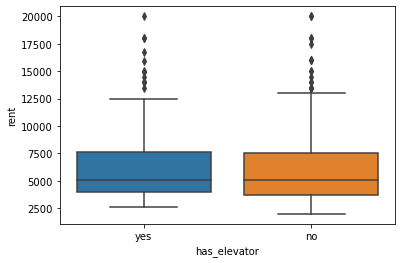

In [49]:
sns.boxplot(x="has_elevator", y="rent", data=rentals[rentals.floor>30])
plt.show()

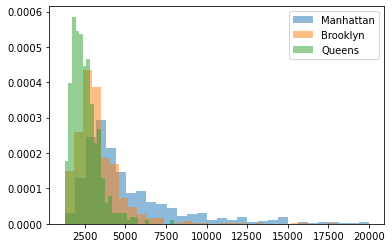

In [51]:
plt.hist(rentals.rent[rentals.borough=="Manhattan"], label="Manhattan", bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=="Brooklyn"], label="Brooklyn", bins=30, density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=="Queens"], label="Queens", bins=30, density=True, alpha=.5)
plt.legend()
plt.show()

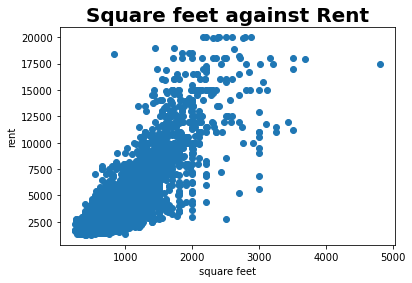

In [60]:
plt.scatter(rentals.size_sqft, rentals.rent)
plt.title("Square feet against Rent", fontsize=20, weight="semibold")
plt.xlabel("square feet")
plt.ylabel("rent")
plt.show()

In [61]:
from scipy.stats import pearsonr
pearsonr(rentals.size_sqft,rentals.rent)

(0.8087835060658337, 0.0)

In [62]:
rentals.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000


<AxesSubplot:>

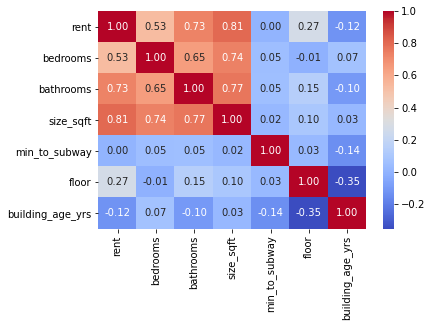

In [67]:
sns.heatmap(data = rentals.corr(), annot=True, cmap="coolwarm",fmt=".2f")

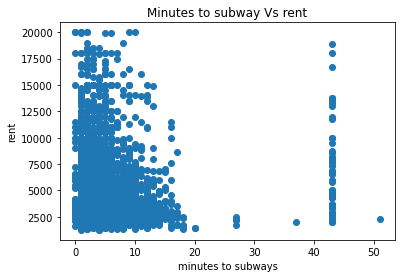

In [71]:
plt.scatter(rentals.min_to_subway, rentals.rent)
plt.xlabel("minutes to subways")
plt.ylabel("rent")
plt.title("Minutes to subway Vs rent")
plt.show()

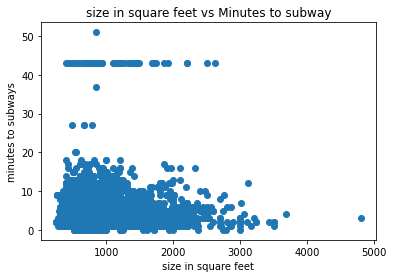

In [72]:
plt.scatter(rentals.size_sqft, rentals.min_to_subway)
plt.ylabel("minutes to subways")
plt.xlabel("size in square feet")
plt.title("size in square feet vs Minutes to subway")
plt.show()

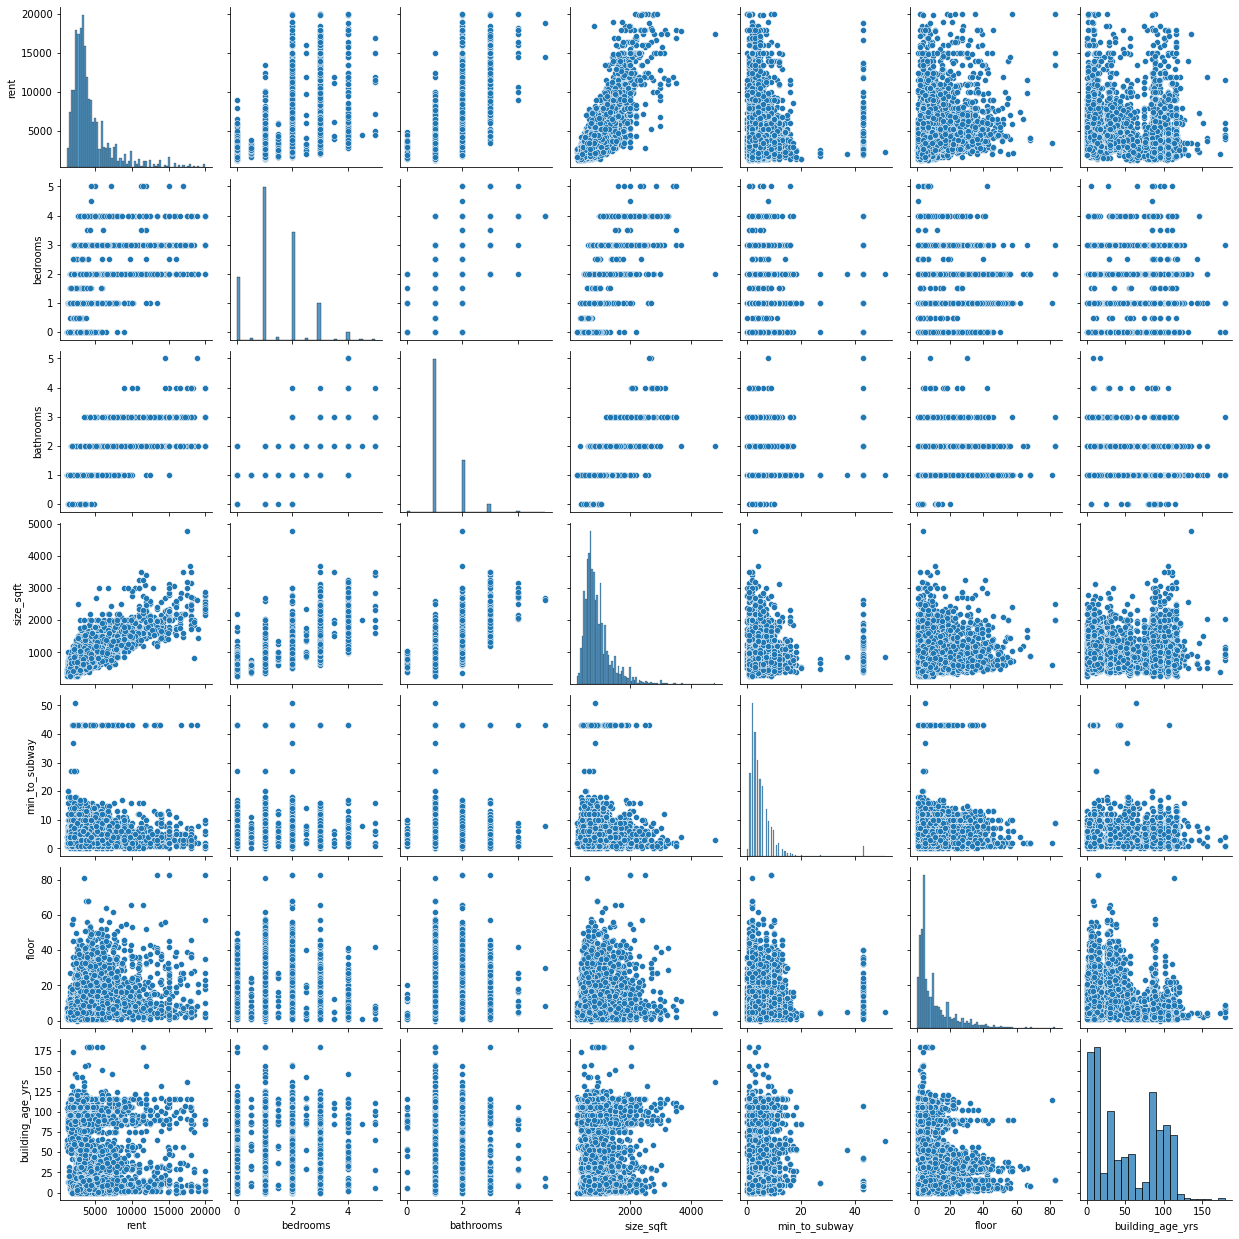

In [73]:
sns.pairplot(rentals)

In [74]:
pd.crosstab(rentals.has_elevator,rentals.has_gym)

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667


<AxesSubplot:xlabel='has_elevator', ylabel='count'>

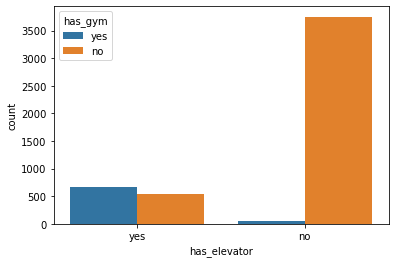

In [75]:
sns.countplot(x="has_elevator", hue="has_gym", data=rentals)

In [76]:
from scipy.stats import chi2_contingency
Xtab = pd.crosstab(rentals.has_elevator,rentals.has_gym)
chi2_contingency(Xtab)

(2172.798470720333,
 0.0,
 1,
 array([[3253.56,  546.44],
        [1027.44,  172.56]]))

In [77]:
Xtab

has_gym,no,yes
has_elevator,,
no,3748,52
yes,533,667
